In [1]:
import sys
sys.path.append("..")  # Ensure project root is found

# Import configurations
from configs.plot_config import apply_plot_settings
from configs.math_functions import F, gaussian, lognormal
from configs.parameters import *
from configs.filenames import *

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.patches import ConnectionPatch
from scipy.signal import find_peaks
from scipy.stats import lognorm
import scipy.interpolate as interp
import os

sig = 0.2
print(f"📢 Using parameters: C={C}, itr={itr}, sig={sig}")

📢 Using parameters: C=0.01, itr=20000, sig=0.2


In [2]:
apply_plot_settings()
output_dir = "../data/"

In [3]:
params = get_params_for_filename(param_keys, globals())
filename = get_filename("discrete", "Interaction", **params)
savefile_interaction = os.path.join(output_dir, filename)

data = np.load(savefile_interaction, allow_pickle=True)
tt_direct = data["tt"]
H_odd_EE_direct = data["H_odd_EE"]
ZE_direct = data["ZE"]
tE_direct = data["tE"]
H_odd_II_direct = data["H_odd_II"]
ZI_direct = data["ZI"]
tI_direct = data["tI"]
T_direct = data["T"]


params = get_params_for_filename(param_keys, globals())
filename = get_filename("gaussian", "Interaction", **params)
savefile_interaction = os.path.join(output_dir, filename)

data = np.load(savefile_interaction, allow_pickle=True)
tt_gaussian = data["tt"]
H_odd_EE_gaussian = data["H_odd_EE"]
ZE_gaussian = data["ZE"]
tE_gaussian = data["tE"]
H_odd_II_gaussian = data["H_odd_II"]
ZI_gaussian = data["ZI"]
tI_gaussian = data["tI"]
T_gaussian = data["T"]


params = get_params_for_filename(param_keys, globals())
filename = get_filename("lognormal", "Interaction", **params)
savefile_interaction = os.path.join(output_dir, filename)

data = np.load(savefile_interaction, allow_pickle=True)
tt_lognormal = data["tt"]
H_odd_EE_lognormal = data["H_odd_EE"]
ZE_lognormal = data["ZE"]
tE_lognormal = data["tE"]
H_odd_II_lognormal = data["H_odd_II"]
ZI_lognormal = data["ZI"]
tI_lognormal = data["tI"]
T_lognormal = data["T"]

In [4]:
### Normalisierung auf 1
########################

max_H_odd_EE_direct = np.amax(H_odd_EE_direct)
max_H_odd_EE_gaussian = np.amax(H_odd_EE_gaussian)
max_H_odd_EE_lognormal = np.amax(H_odd_EE_lognormal)

max_H_odd_II_direct = np.amax(H_odd_II_direct)
max_H_odd_II_gaussian = np.amax(H_odd_II_gaussian)
max_H_odd_II_lognormal = np.amax(H_odd_II_lognormal)

H_odd_EE_direct = H_odd_EE_direct / max_H_odd_EE_direct
H_odd_EE_gaussian = H_odd_EE_gaussian / max_H_odd_EE_gaussian 
H_odd_EE_lognormal = H_odd_EE_lognormal / max_H_odd_EE_lognormal

H_odd_II_direct = H_odd_II_direct / max_H_odd_II_direct
H_odd_II_gaussian = H_odd_II_gaussian / max_H_odd_II_gaussian 
H_odd_II_lognormal = H_odd_II_lognormal / max_H_odd_II_lognormal 

In [5]:
### Cutting to 2pi window
#########################

Start_idx = 0
Start = int(Start_idx)
Stop = T_direct
Stop_idx = int(T_direct/dt)

#tt_direct = tt_direct[:Stop_idx]
#H_odd_EE_direct = H_odd_EE_direct[:Stop_idx]
#H_odd_II_direct = H_odd_II_direct[:Stop_idx]

zero = Start*dt
pi2 = (Start + int((T_direct/4)/dt)) * dt
pi = (Start + int((T_direct/2)/dt)) * dt
pi34 = (Start + int((T_direct*3/4)/dt)) * dt
twopi = (Start + int((T_direct)/dt)) * dt

In [6]:
### Interpolating
#################

H_odd_EE_interp_gaussian = interp.interp1d(np.arange(H_odd_EE_gaussian.size), H_odd_EE_gaussian)
H_odd_EE_compress_gaussian = H_odd_EE_interp_gaussian(np.linspace(0,H_odd_EE_gaussian.size-1, H_odd_EE_direct.size))

H_odd_II_interp_gaussian = interp.interp1d(np.arange(H_odd_II_gaussian.size), H_odd_II_gaussian)
H_odd_II_compress_gaussian = H_odd_II_interp_gaussian(np.linspace(0,H_odd_II_gaussian.size-1, H_odd_II_direct.size))


H_odd_EE_interp_lognormal = interp.interp1d(np.arange(H_odd_EE_lognormal.size), H_odd_EE_lognormal)
H_odd_EE_compress_lognormal = H_odd_EE_interp_lognormal(np.linspace(0,H_odd_EE_lognormal.size-1, H_odd_EE_direct.size))

H_odd_II_interp_lognormal = interp.interp1d(np.arange(H_odd_II_lognormal.size), H_odd_II_lognormal)
H_odd_II_compress_lognormal = H_odd_II_interp_lognormal(np.linspace(0,H_odd_II_lognormal.size-1, H_odd_II_direct.size))

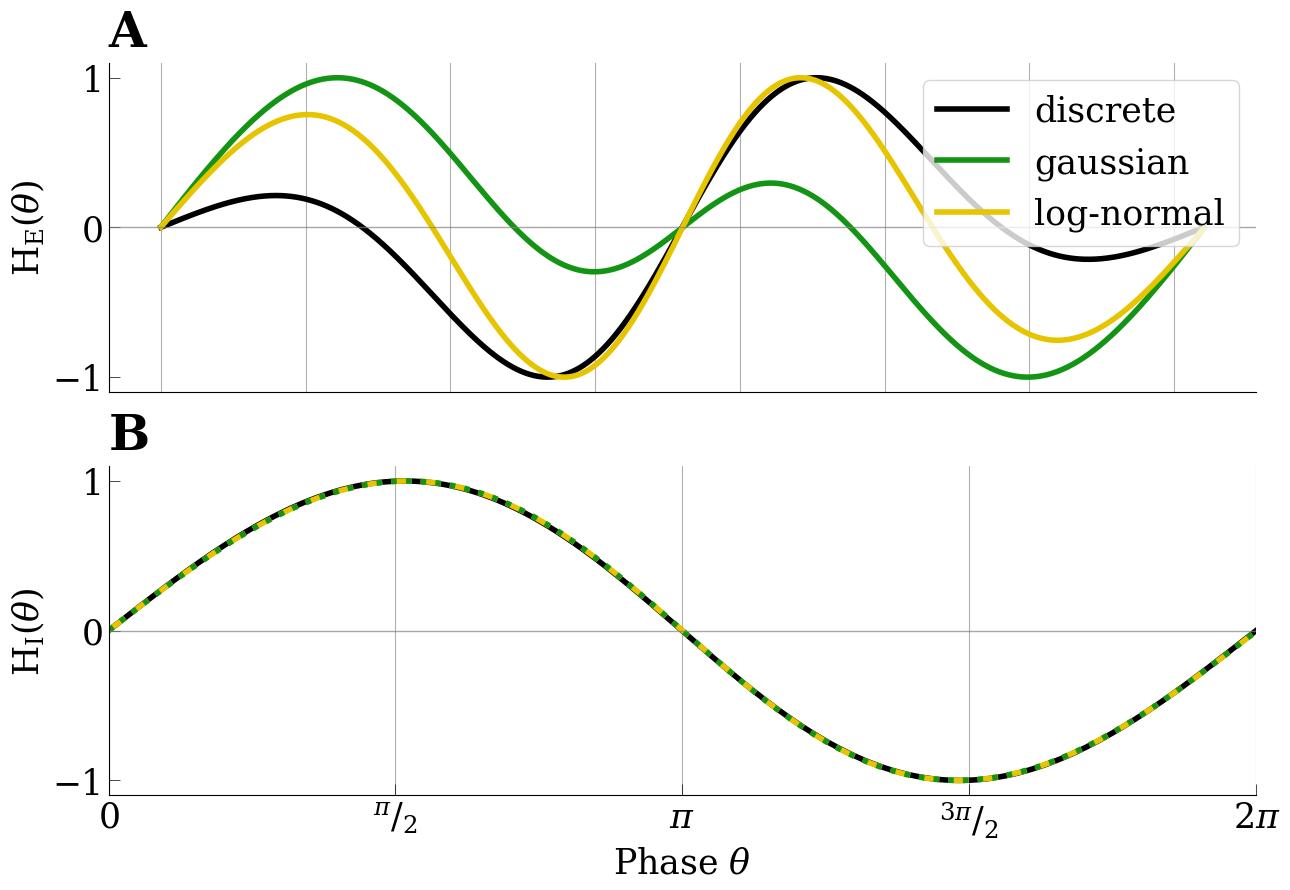

In [7]:
### Interaction function
########################

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(13, 9))

# --- Ax1 ---
ax1 = axes[0]
ax1.plot(tE_direct, H_odd_EE_direct, label='discrete', color='black', linewidth=4)
ax1.plot(np.linspace(Start_idx, Stop, H_odd_EE_compress_gaussian.size),
         H_odd_EE_compress_gaussian, label='gaussian', color='#149414', linewidth=4)
ax1.plot(np.linspace(Start_idx, Stop, H_odd_EE_compress_lognormal.size),
         H_odd_EE_compress_lognormal, label='log-normal', color='#E6C500', linewidth=4)

ax1.axhline(c='grey', lw=1, alpha=0.7)
ax1.set_yticks([-1, 0, 1])
ax1.set_ylabel(r'H$_{\mathrm{E}}(\theta)$')
ax1.tick_params(direction='in', length=8, width=0.5, colors='black', top=False, right=False)
ax1.tick_params(axis='x', colors='black', length=0)
ax1.xaxis.grid()
ax1.legend()
ax1.set_xticklabels([])  # Hide x tick labels on ax1
ax1.annotate('A', xy=(0, 1.05), xycoords='axes fraction', fontsize=35, weight="bold")

# --- Ax2 ---
ax2 = axes[1]
ax2.plot(tI_direct, H_odd_II_direct, color='black', linewidth=4)
ax2.plot(np.linspace(Start_idx, Stop, H_odd_II_compress_lognormal.size),
         H_odd_II_compress_lognormal, color='#E6C500', linewidth=4, linestyle='dashed')
ax2.plot(np.linspace(Start_idx, Stop, H_odd_II_compress_gaussian.size),
         H_odd_II_compress_gaussian, color='#149414', linewidth=4, linestyle='dotted')

ax2.axhline(c='grey', lw=1, alpha=0.7)
ax2.set_xlim(zero, twopi)
ax2.set_xticks([zero, pi2, pi, pi34, twopi])
ax2.set_xticklabels(('$0$', '$^{\pi}/_{2}$', '$\pi$', '$^{3\pi}/_{2}$', '$2\pi$'))
ax2.set_yticks([-1, 0, 1])
ax2.set_ylabel(r'H$_{\mathrm{I}}(\theta)$')
ax2.set_xlabel(r'Phase $\theta$')
ax2.tick_params(direction='in', length=8, width=0.5, colors='black', top=False, right=False)
ax2.xaxis.grid()
ax2.annotate('B', xy=(0, 1.05), xycoords='axes fraction', fontsize=35, weight="bold")

# Layout and save
fig.tight_layout()
plt.savefig("../figures/fig4.pdf", bbox_inches="tight")
plt.show()
